In [6]:
!pip install kaggle
from google.colab import files

# Upload kaggle.json
uploaded = files.upload()

# Move the uploaded file to the required directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [7]:
!kaggle datasets download -d gauravmalik26/food-delivery-dataset

  0% 0.00/1.95M [00:00<?, ?B/s]
100% 1.95M/1.95M [00:00<00:00, 47.8MB/s]


In [8]:
import zipfile

with zipfile.ZipFile('/content/food-delivery-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [9]:
import pandas as pd
import numpy as np
import math
from sklearn.impute import SimpleImputer
from datetime import datetime


In [10]:
df = pd.read_csv('train.csv')
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [11]:
df.replace({"NaN": np.nan}, regex=True, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          43739 non-null  object 
 3   Delivery_person_Ratings      43685 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  43862 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            44977 non-null  object 
 12  Road_traffic_density         44992 non-null  object 
 13  Vehicle_conditio

In [12]:
df.drop(columns=['ID'],inplace=True)

In [13]:
import math
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = 6371 * c
    return distance

In [14]:
distances = []
for index, row in df.iterrows():
    distance = haversine(row['Restaurant_latitude'], row['Restaurant_longitude'],
                         row['Delivery_location_latitude'], row['Delivery_location_longitude'])
    distances.append(distance)

df['Distance'] = distances

In [15]:
df.drop(columns=['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude'], inplace=True)

In [16]:
df['Time_taken(min)'] = df['Time_taken(min)'].str.replace(r'\(min\)', '').astype(int)

<ipython-input-16-3eb4e4a31755>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Time_taken(min)'] = df['Time_taken(min)'].str.replace(r'\(min\)', '').astype(int)


In [17]:
df.describe()

,Vehicle_condition,Time_taken(min),Distance
count,45593.000000,45593.000000,45593.000000
mean,1.023359,26.294607,99.303911
std,0.839065,9.383806,1099.731281
min,0.000000,10.000000,1.465067
25%,0.000000,19.000000,4.663493
50%,1.000000,26.000000,9.264281
75%,2.000000,32.000000,13.763977
max,3.000000,54.000000,19692.674606


In [18]:
df.isnull().sum()

Delivery_person_ID            0
Delivery_person_Age        1854
Delivery_person_Ratings    1908
Order_Date                    0
Time_Orderd                1731
Time_Order_picked             0
Weatherconditions           616
Road_traffic_density        601
Vehicle_condition             0
Type_of_order                 0
Type_of_vehicle               0
multiple_deliveries         993
Festival                    228
City                       1200
Time_taken(min)               0
Distance                      0
dtype: int64

In [19]:
df.nunique()

Delivery_person_ID         1320
Delivery_person_Age          22
Delivery_person_Ratings      28
Order_Date                   44
Time_Orderd                 176
Time_Order_picked           193
Weatherconditions             6
Road_traffic_density          4
Vehicle_condition             4
Type_of_order                 4
Type_of_vehicle               4
multiple_deliveries           4
Festival                      2
City                          3
Time_taken(min)              45
Distance                   4791
dtype: int64

In [20]:
l = []
for i in df['Delivery_person_ID']:
    l.append(i.split('RES')[0])

In [21]:
df['Dest_city']=l
df['Dest_city'].value_counts()

JAP       3443
RANCHI    3229
BANG      3195
SUR       3187
HYD       3181
MUM       3173
MYS       3171
COIMB     3170
VAD       3166
INDO      3159
CHEN      3145
PUNE      3132
AGR        763
LUDH       758
ALH        740
KNP        740
DEH        737
GOA        709
AURG       703
KOC        701
KOL        700
BHP        691
Name: Dest_city, dtype: int64

In [22]:
df.drop(columns=['Delivery_person_ID'],inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      43739 non-null  object 
 1   Delivery_person_Ratings  43685 non-null  object 
 2   Order_Date               45593 non-null  object 
 3   Time_Orderd              43862 non-null  object 
 4   Time_Order_picked        45593 non-null  object 
 5   Weatherconditions        44977 non-null  object 
 6   Road_traffic_density     44992 non-null  object 
 7   Vehicle_condition        45593 non-null  int64  
 8   Type_of_order            45593 non-null  object 
 9   Type_of_vehicle          45593 non-null  object 
 10  multiple_deliveries      44600 non-null  object 
 11  Festival                 45365 non-null  object 
 12  City                     44393 non-null  object 
 13  Time_taken(min)          45593 non-null  int64  
 14  Distance              

In [24]:
df['Delivery_person_Age'] = df['Delivery_person_Age'].astype('float')
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype('float')

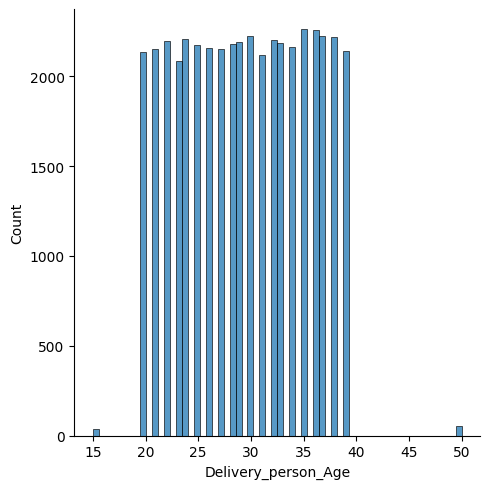

In [25]:
import seaborn as sns
sns.displot(df['Delivery_person_Age'], kind='hist')
import matplotlib.pyplot as plt
plt.show()

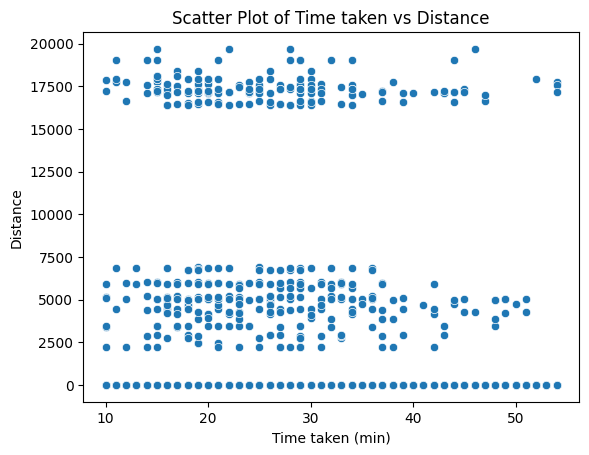

In [26]:
sns.scatterplot(x=df['Time_taken(min)'], y=df['Distance'])
plt.title('Scatter Plot of Time taken vs Distance')
plt.xlabel('Time taken (min)')
plt.ylabel('Distance')
plt.show()

In [27]:
df

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Distance,Dest_city
0,37.0,4.9,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,24,3.025149,INDO
1,34.0,4.5,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33,20.183530,BANG
2,23.0,4.4,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26,1.552758,BANG
3,38.0,4.7,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21,7.790401,COIMB
4,32.0,4.6,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30,6.210138,CHEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30.0,4.8,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,32,1.489846,JAP
45589,21.0,4.6,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,36,11.007735,AGR
45590,30.0,4.9,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,16,4.657195,CHEN
45591,20.0,4.7,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,26,6.232393,COIMB


<Axes: ylabel='Distance'>

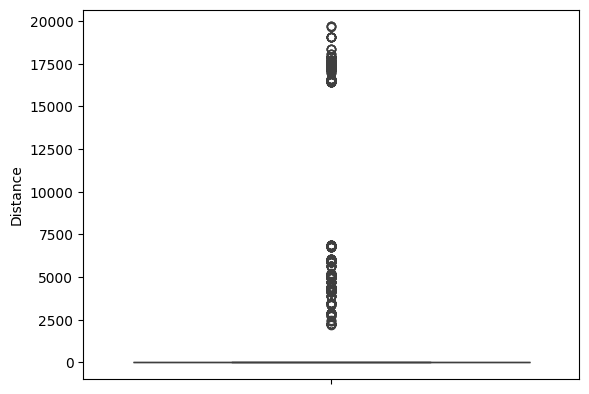

In [28]:
sns.boxplot(df['Distance'])

In [29]:
df[df['Distance']>1000].shape[0]
df = df[df['Distance'] <= 1000]

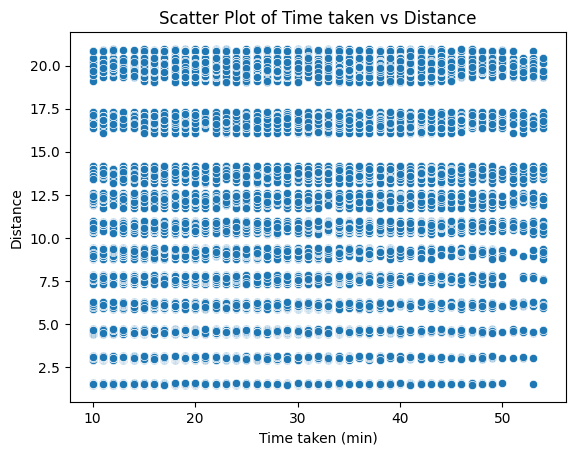

In [30]:
sns.scatterplot(x=df['Time_taken(min)'], y=df['Distance'])
plt.title('Scatter Plot of Time taken vs Distance')
plt.xlabel('Time taken (min)')
plt.ylabel('Distance')
plt.show()

28

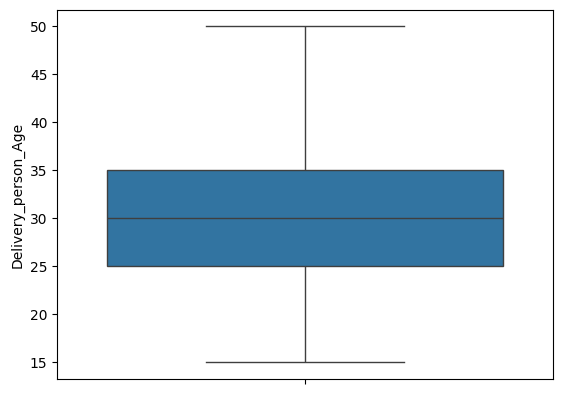

In [31]:
sns.boxplot(df['Delivery_person_Age'])
df[df['Delivery_person_Age']<18].shape[0]

28

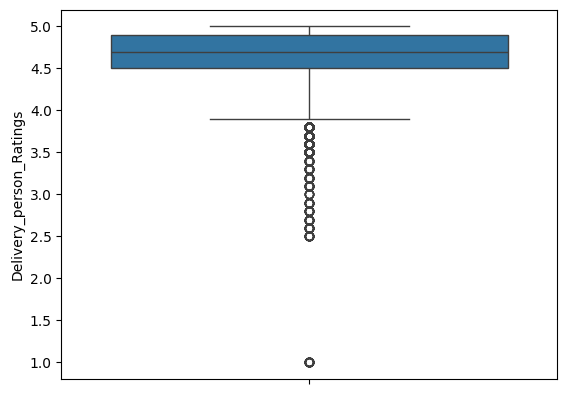

In [32]:
df = df[df['Delivery_person_Ratings'] <= 5]
sns.boxplot(df['Delivery_person_Ratings'])
df[df['Delivery_person_Ratings']<2].shape[0]

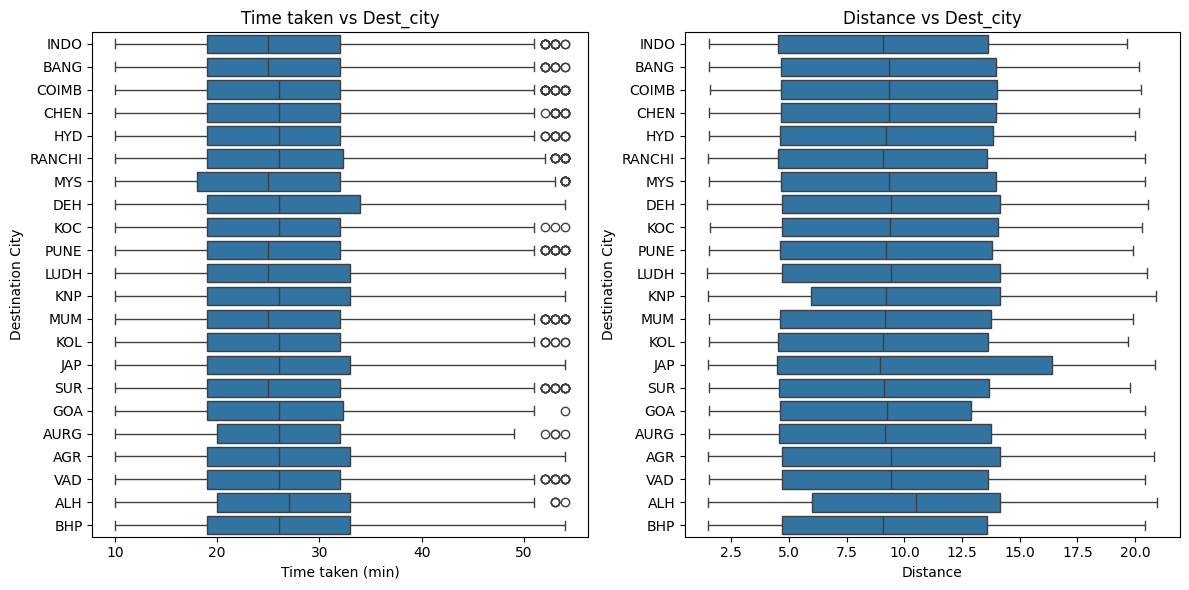

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df, x='Time_taken(min)', y='Dest_city', ax=axes[0])
axes[0].set_title('Time taken vs Dest_city')
axes[0].set_xlabel('Time taken (min)')
axes[0].set_ylabel('Destination City')

sns.boxplot(data=df, x='Distance', y='Dest_city', ax=axes[1])
axes[1].set_title('Distance vs Dest_city')
axes[1].set_xlabel('Distance')
axes[1].set_ylabel('Destination City')

plt.tight_layout()
plt.show()

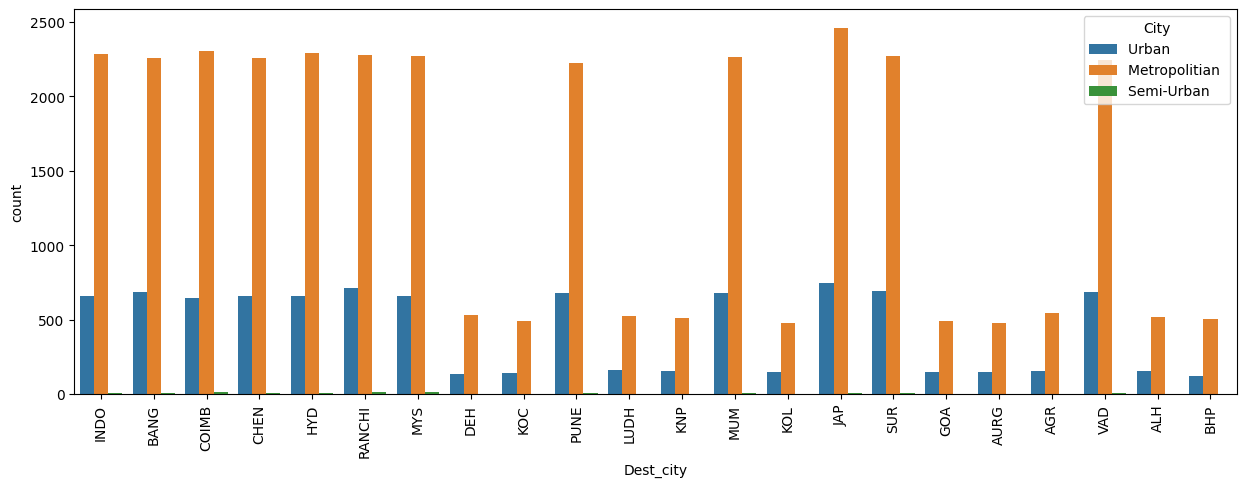

In [34]:
plt.figure(figsize=(15,5))
sns.countplot(x=df.Dest_city,hue=df.City)
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='City', ylabel='count'>

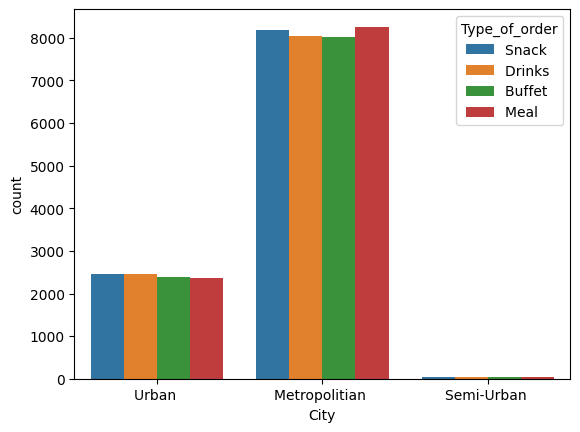

In [35]:
sns.countplot(x=df.City,hue=df.Type_of_order)

<Axes: xlabel='City', ylabel='count'>

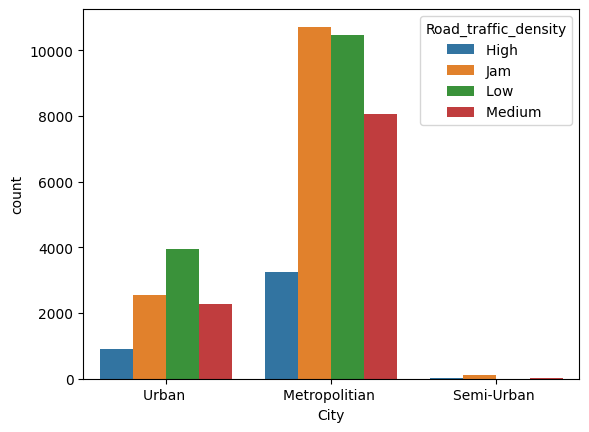

In [36]:
sns.countplot(x=df.City,hue=df.Road_traffic_density)

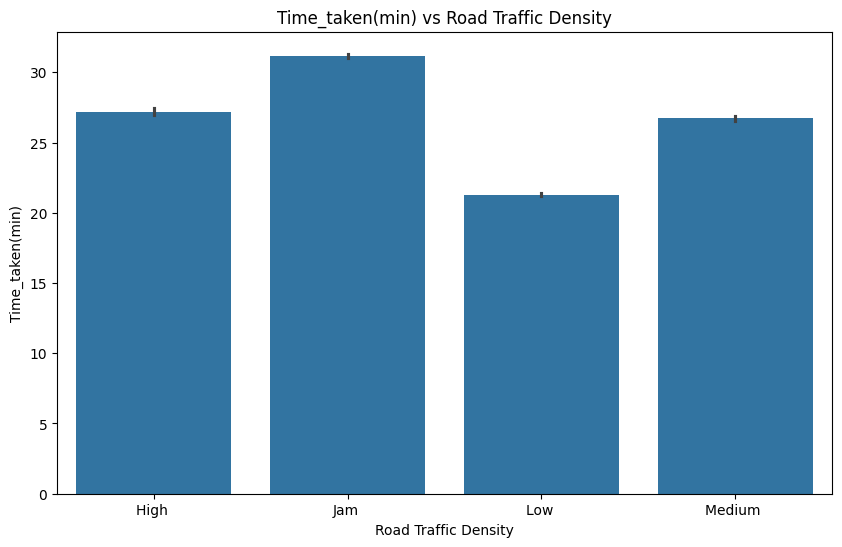

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Road_traffic_density', y='Time_taken(min)')
plt.title('Time_taken(min) vs Road Traffic Density')
plt.xlabel('Road Traffic Density')
plt.ylabel('Time_taken(min)')
plt.show()

In [38]:
df.drop(['Order_Date','Time_Orderd','Time_Order_picked','Dest_city'],axis=1,inplace=True)

In [39]:
df.dropna(inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41222 entries, 0 to 45592
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      41222 non-null  float64
 1   Delivery_person_Ratings  41222 non-null  float64
 2   Weatherconditions        41222 non-null  object 
 3   Road_traffic_density     41222 non-null  object 
 4   Vehicle_condition        41222 non-null  int64  
 5   Type_of_order            41222 non-null  object 
 6   Type_of_vehicle          41222 non-null  object 
 7   multiple_deliveries      41222 non-null  object 
 8   Festival                 41222 non-null  object 
 9   City                     41222 non-null  object 
 10  Time_taken(min)          41222 non-null  int64  
 11  Distance                 41222 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 4.1+ MB


In [41]:
obj=df.select_dtypes(include=['object'])
num=df.select_dtypes(include=['int64','float64'])
print(obj.columns)
print(num.columns)

Index(['Weatherconditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City'],
      dtype='object')
Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition',
       'Time_taken(min)', 'Distance'],
      dtype='object')


In [42]:
obj=['Weatherconditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City']
num=['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition', 'Distance']

In [43]:
X = df.drop('Time_taken(min)',axis=1)
y = df[['Time_taken(min)']]

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

numerical_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler(with_mean=False))
])
categorical_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore')),
    ('scaler',StandardScaler(with_mean=False))
])

In [45]:
from sklearn.compose import ColumnTransformer

pipe =ColumnTransformer([
    ('numerical',numerical_pipeline,num),
    ('categorical',categorical_pipeline,obj)
])

In [46]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [47]:
X_train=pipe.fit_transform(X_train)
X_test=pipe.transform(X_test)

In [48]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
xg_reg.fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)
print(mean_squared_error(y_test, y_pred))

14.261723693080366


In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)


Mean Squared Error: 14.261723693080366
Mean Absolute Error: 3.0248023512581756
Root Mean Squared Error: 3.776469739463083
R-squared (R2): 0.8358013389240726
